# Computer Exercise 01 - KDE and Naive Bayes Classifiers ##

### Instructions ###

Included below is the core code for this computer exercise.
You will need to make changes and modifications to perform the experiements and to experiment with other ideas.  Experimenting and exploring other ideas outside of what is suggested is strongly encouraged.

## Part 1:  Kernel Density Estimation



### Question for discussion at p.4 ###
I believe (a) Estimate $p(\textbf{x})$ from the entire dataset and then randomly select samples from this desnity is preferable. I believe this is preferable to approach (b) because the integers do not appear randomly, they appear at the frequency of $Pr\{y=k\} = \frac{n_k}{N}$. Therefore, we want to approximate this scaling.

### Load Libraries and Data

sklearn.neighbors provides (un)supervised neighbors-based learning methods:
- Unsupervised: Manifold learning, spectral clustering
- Supervised: Classification (data with discrete labels), regression (data with continuous labels)
- Non-parametric method
- Classes can handle NumPy arrays or scipy.sparse matrixes
- KDE relies on nearest neighbors and performance degrades due to curse of dimensionality
KernelDensity  implemented through Ball Tree or KD Tree

sklearn.decomposition provides matrix decomposition algorithms for dimensionality reduction.
Principal Component Analysis (PCA) uses SVD to project data to lower dimensional space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

### Load Data ###

#### MNIST Dataset
If you prefer to use the MNIST dataset, run the following instructions.
The images will be stored in the numpy array `X` and the target values in `y`.

In [2]:
# allows you to fetch datasets from openml.com
from sklearn.datasets import fetch_openml
# fetch mnist_784 dataset, 784 features, 70000 observations, digits size-normalized and centered 
# in fixed-size image (minimal preprocessing needed)
mnist = fetch_openml('mnist_784', version=1, parser='auto')
# Extract features and labels
X, y = mnist["data"], mnist["target"]
# Convert the DataFrame to a NumPy array
X = X.to_numpy()
y = y.astype(int)

In [3]:
# getting information about mnist data to determine how it was split above
print(mnist.frame.info())
print(mnist.frame.shape)
print(mnist.frame.head())
print(mnist.frame.columns)
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), int64(784)
memory usage: 418.8 MB
None
(70000, 785)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         

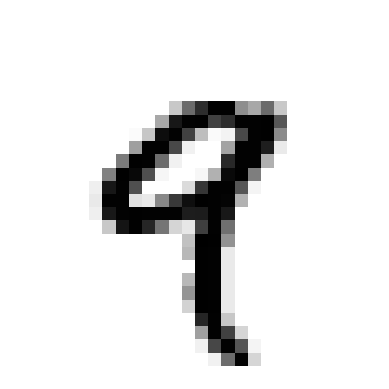

In [4]:
plt.axis('off')
plt.imshow(X[4].reshape(28, 28),cmap='binary')

### Display an array of images

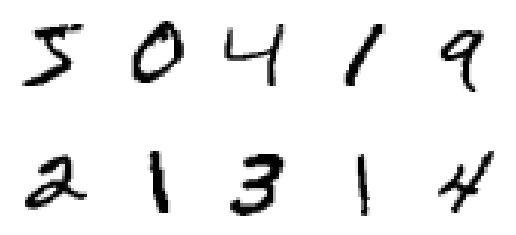

In [5]:
# Plot the first 9 images in the training set
for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='binary')
    plt.axis('off')
plt.show()

### Questions for Discussion p. 7 ###

(a) 
- 17 grayscale bins
- 64 length feature vector
- 17 * 64 = 1088 bins

(b)
- 256 grayscale bins
- 784 length feature vector
- 256 * 784 = 200704

(c)
The curse of dimensionality presents an issue when dealing with many datasets, including MNIST. The high number of features slows down the training speed and increases computational cost. For MNIST, as shown in the 5 images visulaized, the underlying vector seems to be sparse which results in alot of white space. In addition, the location of the pixels is correlated. This suggests we can reduce the dimensions of the feature space and not lose much information. Assuming the border is white space (and thinking of the images as 28 x 28 matrices), I'd remove rows and columns 0, 1, 26, 27 resulting in a new feature space of 576.

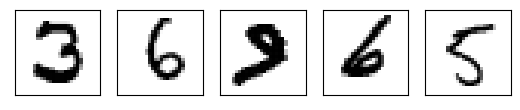

In [6]:
import random
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(X[random.randrange(0,X.shape[0])].reshape(28, 28), cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])
    # plt.axis('off')
plt.show()

## Principal Components Analysis

Perform PCA on the images stored as vectors in `X`.
Note that the number of components must be specified, otherwise there will be no reduction in dimension. 

The first step may be to plot the explained variance.

### Plot the Explained Variance in PCA ##

Here, the explained variance is plotted for all components.  To plot over a smaller range, you may change the first line to `pca=PCA(50)` to plot the first fifty values.

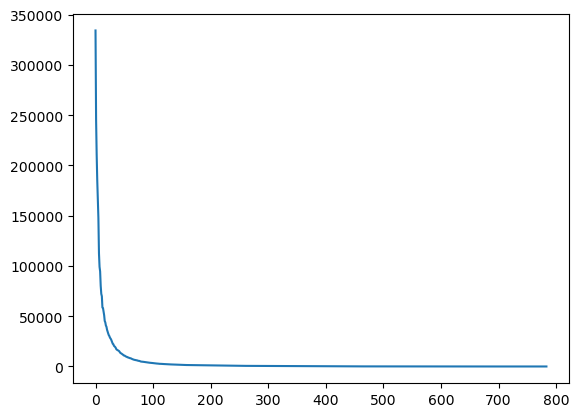

In [7]:
pca = PCA()
data = pca.fit_transform(X)
v = pca.explained_variance_
plt.plot(v)
plt.show()

As shown above the explained variance drops precipitously by the $100^{th}$ component. This indicates that we can reduce the feature space by quite a lot.

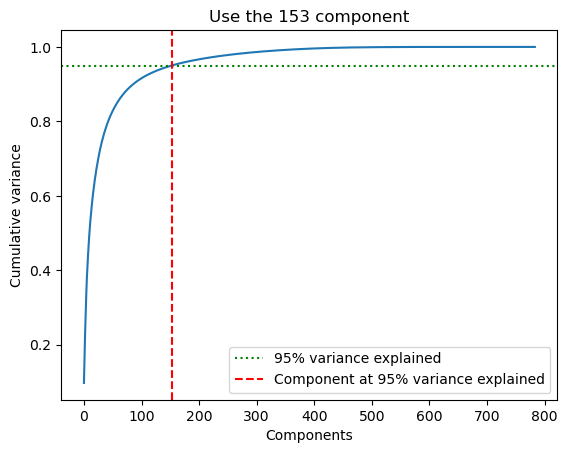

In [8]:
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
comp_95 = 0
for i in range(len(cumulative_sum)):
    if cumulative_sum[i] >= 0.95:
        comp_95 = i
        break
plt.plot(cumulative_sum)
plt.axhline(y = 0.95, color = 'g', linestyle = ':', label = "95% variance explained")
plt.axvline(x = comp_95, color = 'r', linestyle = '--', label = "Component at 95% variance explained")
plt.xlabel("Components")
plt.ylabel("Cumulative variance")
plt.legend(loc = 'lower right')
plt.title("Use the " + str(comp_95) + " component")
plt.show()

### PCA on Image Dataset

In [9]:
pca = PCA(comp_95) # Put a number in the parenthesis to set the number of PCA components 
X_pc = pca.fit_transform(X)

## Kernel Density Estimation

Here KDE is used to estimate the probability density function of the data.  

In [10]:
kde = KernelDensity().fit(X_pc)  #Default values are used here.

### Generate New Digits
Here the generative model is used to generate 40 new digits by sampling the estimated density function.

In [11]:
new_data = kde.sample(40)

In [12]:
new_data = pca.inverse_transform(new_data)

### Show some generated digits

Show the generated digits.  

**NOTE:**  It is assumed that there are 40 are generated

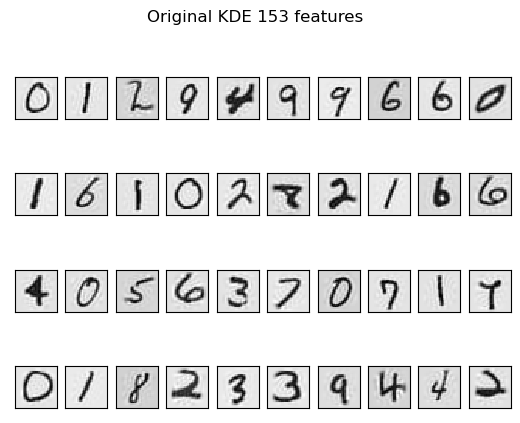

In [13]:
# turn data into a 4x11 grid

new_data = new_data.reshape((4, 10, -1))
# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        
        im = ax[i, j].imshow(new_data[i, j].reshape((28,28)),
                    cmap=plt.cm.binary, interpolation='nearest')

fig.suptitle("Original KDE " + str(comp_95) + " features")

plt.show()

### Experiments with KDE ###

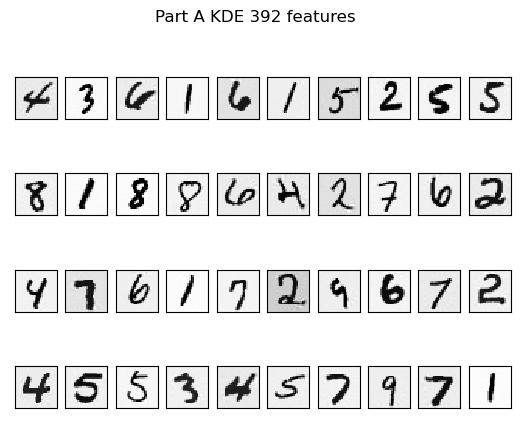

In [14]:
# Part A
# Instantiate PCA and reduce the number of features in X by half

pca = PCA(X.shape[1]//2)
part_1_data_pca = pca.fit_transform(X)

# the default bandwidth and kernel are 1.0 and Gaussian, respectively
kde = KernelDensity().fit(part_1_data_pca)

part_a_data = kde.sample(40)

data_shape = part_a_data.shape[1]

part_a_inverse_pca = pca.inverse_transform(part_a_data)

new_data = part_a_inverse_pca.reshape((4, 10, -1))

# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        
        im = ax[i, j].imshow(new_data[i, j].reshape((28,28)),
                    cmap=plt.cm.binary, interpolation='nearest')

fig.suptitle("Part A KDE " + str(data_shape) + " features")

plt.show()

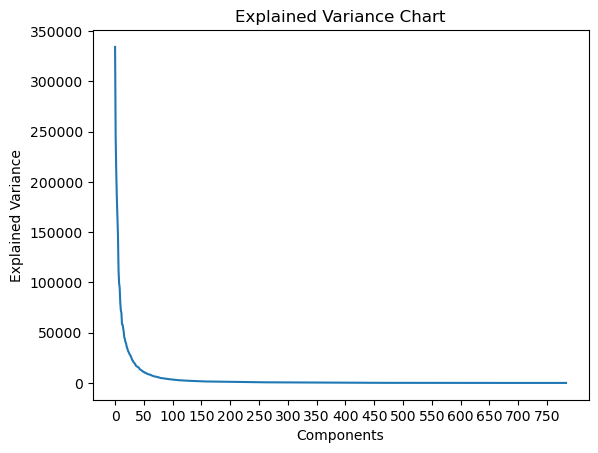

In [15]:
# Part b

pca = PCA()
part_b_data = pca.fit_transform(X)
expl_var = pca.explained_variance_
plt.plot(expl_var)
plt.title("Explained Variance Chart")
plt.ylabel("Explained Variance")
plt.xlabel("Components")
plt.xticks(np.arange(0, X.shape[1], step=50))
plt.show()

We can see from the chart above the elbow point falls around 50, I will choose 47 as the number of components.

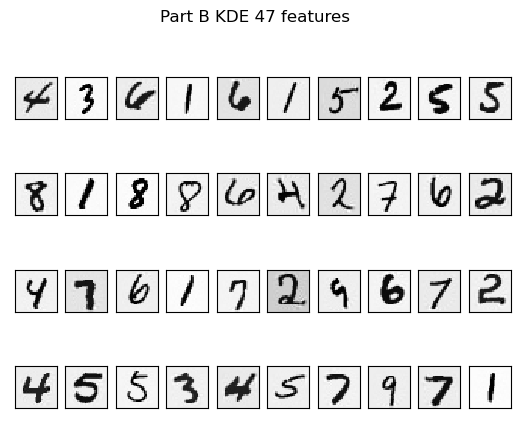

In [16]:
pca = PCA(47)

part_b_data = pca.fit_transform(X)

kde_part_b = KernelDensity().fit(part_b_data)

sample_b = kde_part_b.sample(40)

b_inv_tr = pca.inverse_transform(sample_b)

new_data_b = b_inv_tr.reshape((4, 10, -1))

# plot resampled digits
fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(10):
    for i in range(4):
        
        im = ax[i, j].imshow(new_data[i, j].reshape((28,28)),
                    cmap=plt.cm.binary, interpolation='nearest')

fig.suptitle("Part B KDE " + str(part_b_data.shape[1]) + " features")

plt.show()

### Part C 

I do not notice much of a difference between the samples using 392 and 47 components. The images with 47 components may be slightly fuzzier, but I do not notice a large difference. I believe the lack of noticeable distortion validates the use of PCA around an "elbow" value or at a large amount of cumulative variance because the remaining features are not adding much value and the tradeoff in training time and computational cost may be worth it. 

In [17]:
# Part d
# define function to loop through the different values of k required for the problem
def pca_and_plot(features):
    pca = PCA(features)
    part_d_data = pca.fit_transform(X)
    kde_part_d = KernelDensity().fit(part_d_data)
    sample_d = kde_part_d.sample(40)
    d_inv_tr = pca.inverse_transform(sample_d)
    new_data_d = d_inv_tr.reshape((4, 10, -1))
    fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
    for j in range(10):
        for i in range(4):
            im = ax[i, j].imshow(new_data_d[i, j].reshape((28,28)),
                        cmap=plt.cm.binary, interpolation='nearest')
    fig.suptitle("Part D KDE " + str(features) + " features")
    plt.show()

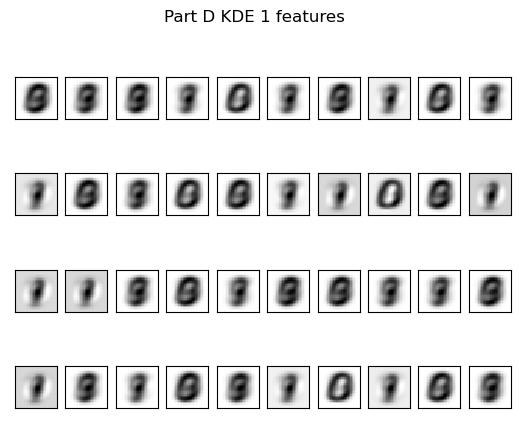

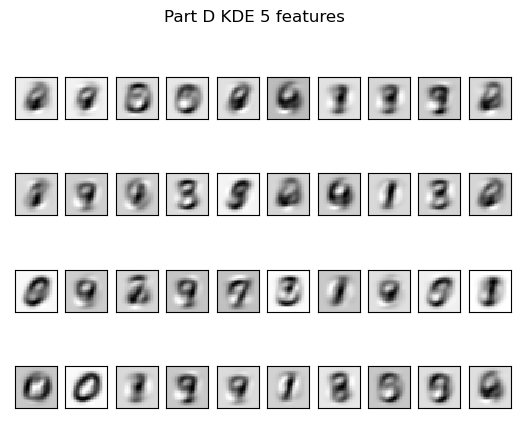

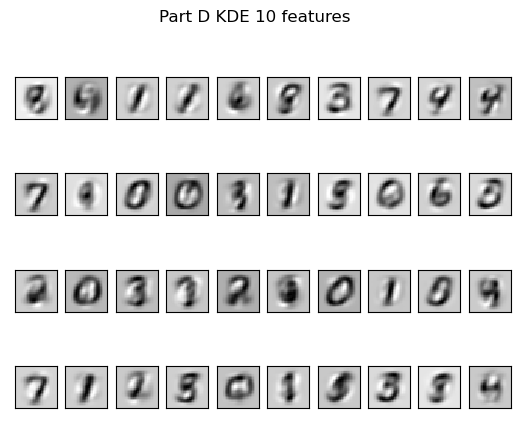

In [18]:
for i in [1, 5, 10]:
    pca_and_plot(i)

As shown in the 3 figures above, using the values 1, 5, and 10 as the number of components in PCA is too small. This results in the feature vector not having enough variation so the image looks too smooth and the images are non-descript. I don't believe a digit classifier would perform well with these images because it wouldn't be able to determine the shape of each digit. From the PCA explained variance charts above this makes sense because the first few components explain a large amount of the variation in the data.

In [19]:
# Part E

# create a function to loop through the various bandwidths

def band_and_chart(band):
    kde = KernelDensity(bandwidth = band).fit(X)
    
    sample = kde.sample(40)
    new_data = sample.reshape((4, 10, -1))
    fig, ax = plt.subplots(4, 10, subplot_kw=dict(xticks=[], yticks=[]))
    for j in range(10):
        for i in range(4):
            im = ax[i, j].imshow(new_data[i, j].reshape((28,28)),
                        cmap=plt.cm.binary, interpolation='nearest')
    fig.suptitle("Part E KDE " + str(band) + " bandwith")
    plt.show()

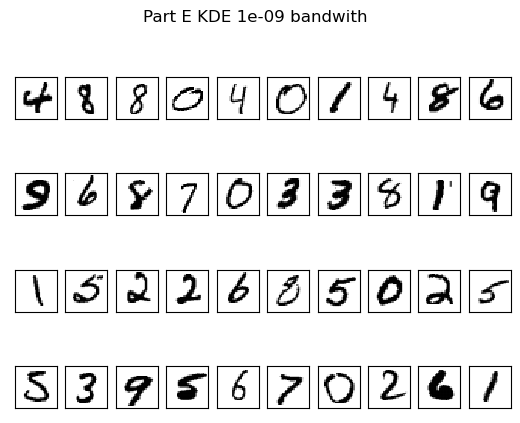

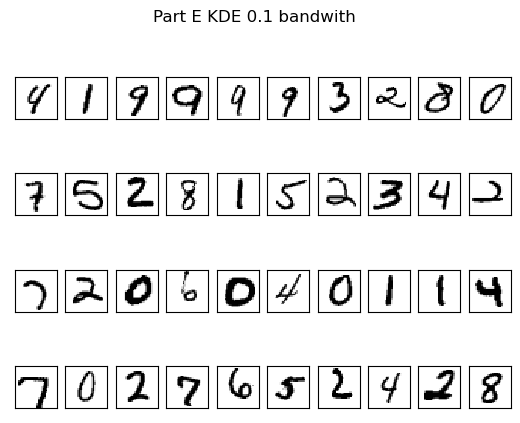

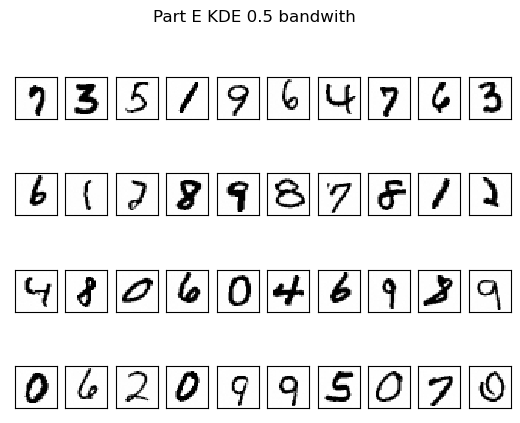

In [20]:
# values less than 1
for i in [0.000000001, 0.1, 0.5]:
    band_and_chart(i)

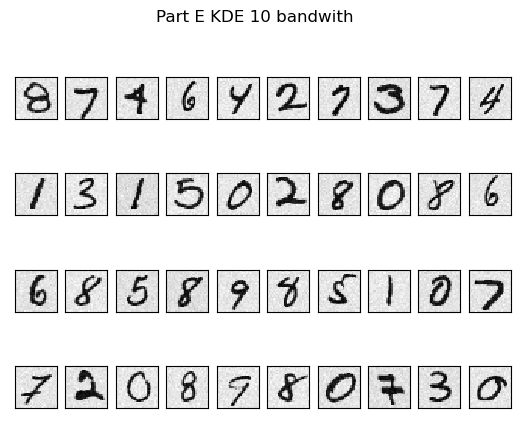

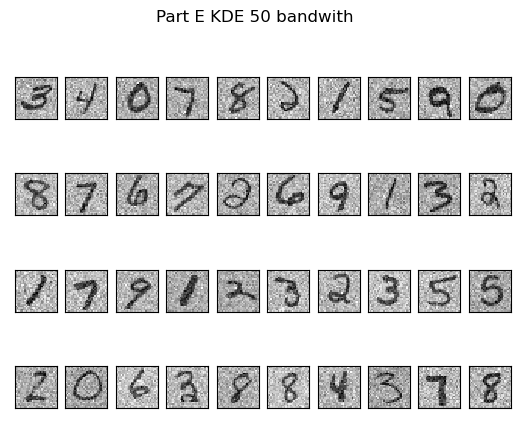

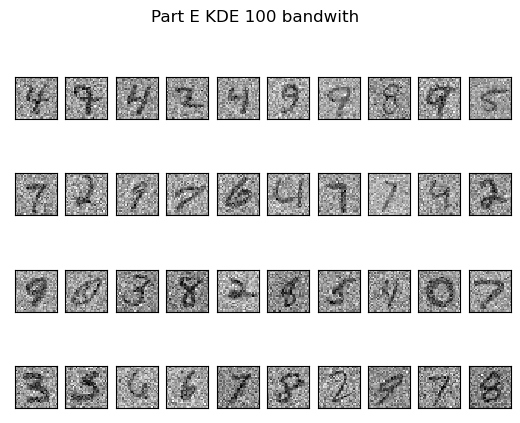

In [21]:
# values greater than 1

for i in [10, 50, 100]:
    band_and_chart(i)

I notice that as bandwidth goes to zero the numbers become darker and the backgrounds whiter. As the bandwidth increases the backgrounds become increasingly noisy and by a bandwidth of 100 the images begin to become unrecognizable. Analytically, as the bandwidth increases the images become too smooth (high-bias) which is why more of the image becomes static and as the bandwidth decreases we see more sharpness (high-variance); however, this sharpness may be accentuating boundaries incorrectly.

### Conclusions ###

Through this lesson I have learned the importance of dimensionality reduction and bandwidth selection in data generation using KDE. As we increase the number of features of the data we will gain more information, but more of it will become redundant. This can cause problems because the increased feature size will create sparser matrices and can affect the fit of the model. Using PCA, along with inspection of explained variance, we can project the data to a lower dimension thus ameliorating this problem. Dimensionality reduction should be considered when we begin data cleaning. Bandwidth selection is important for smoothing the sampled values. With low bandwidth causing sharp images which may have too much variance while high bandwidth will result in fuzzy images with too much bias. I believe the model is more sensitive to the dimension of the new space. It did not take much for the values to become unrecognizable.

## Part 2: Naive Bayes

### The Loan Dataset

In this example, we will be loading Loan Data from DataLab using the pandas 'read_csv` function. 

In [22]:
# This assumes the loan_data.csv dataset is in the same directory as the jupyter notebook
import pandas as pd

df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Data Exploration

To understand more about the dataset we will use `.info()`.

The dataset consists of 14 columns and 9578 rows.
Apart from “purpose”, columns are either floats or integers. 
Our target column is “not.fully.paid”. 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


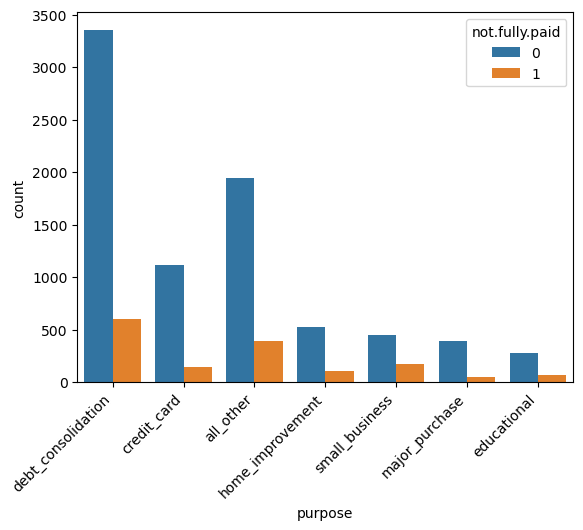

In [24]:
import seaborn as sns

sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');

# purpose is the purpose for the loan request

### Data Processing 

We will now convert the ‘purpose’ column from categorical to integer using pandas `get_dummies` function.

In [25]:
from sklearn.model_selection import train_test_split

pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']
# reserve 25% of dataset for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=125)


## Model Building and Training

Model building and training is quite simple. We will be training a model on a training dataset using default hyperparameters. 

In [26]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train);

## Model Evaluation


In [27]:
accuracy = clf.score(X_test,y_test)
print("Accuracy = ", accuracy)

Accuracy =  0.8187891440501044


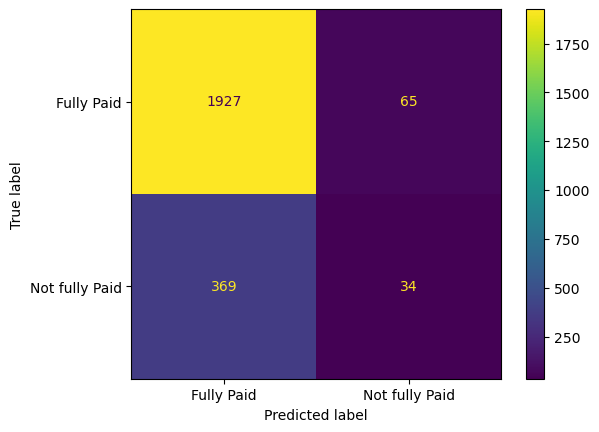

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# use test dataset to create array of predicted outputs
y_pred = clf.predict(X_test)
labels = ["Fully Paid", "Not fully Paid"]
# confusion_matrix(y_true, y_pred): compare classified test data to predicted test
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

### Evaluation ###

(ii) Correctly classifying client will default on their loans
- True label (369 + 34)
- Predicted (34)
- Accuracy: 8%

(iii) Correctly classifying paid back loan
- True label (1927 + 65)
- Predicted (1927)
- Accuracy: 97%

The confusion matrix above shows the classifier has good accuracy classifying low-risk events, but terrible accuracy classifying high-risk events. I believe part of the reason for the mismatch between the overall accuracy and the by-class accuracy is the unbalanced data is giving alot of weight to the 97% accuracy because these are very common observations which I assume is also effecting the ability of the Naive Bayes Classifier to learn the uncommon events. Using a minimum risk classifier, to add weight to high risk events, may be a more suitable approach.

To deal with the imbalance I believe you would use class weights to give more importance to the less common class; however, Naive Bayes only takes into account sample weight so maybe using another model would be more suitable in addition to the weights.